In [ ]:
## Install Tesseract OCR
!sudo apt-get install tesseract-ocr
## install pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,795 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Facture_2.jpg')

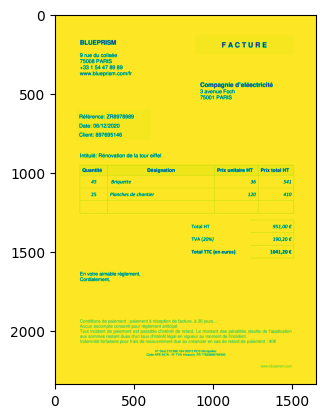

In [ ]:
## apply gray sclae for reduce the dimensionality of the image
gray_img=cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)
plt.show()

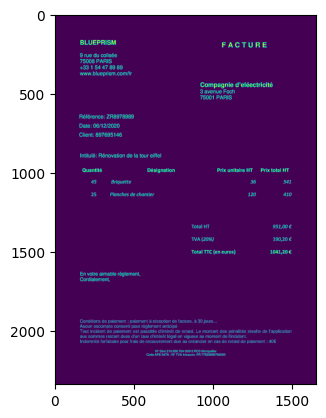

In [ ]:
## apply threshold filtre using OTSU to creates a binary image where pixel values are either 0 or 255
ret , threshold = cv2.threshold(gray_img , 0 , 255 , cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.imshow(threshold)
plt.show()

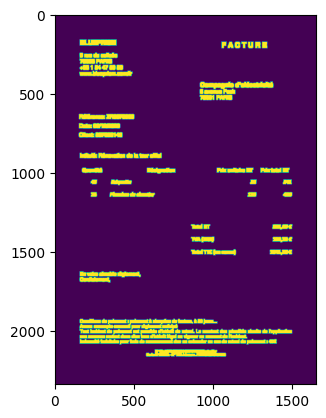

In [ ]:
rect_kernel=cv2.getStructuringElement(cv2.MORPH_RECT , (10,10))
dilated=cv2.dilate(threshold , rect_kernel , iterations=1)
plt.imshow(dilated)
plt.show()

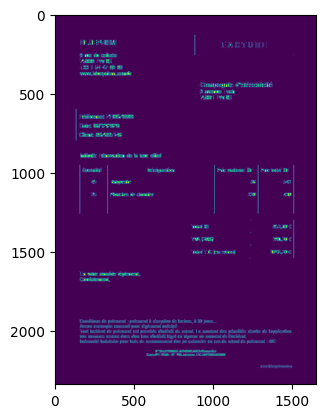

In [ ]:
linek=np.zeros((10,10), dtype=np.uint8)
linek[5,...]=1
img_morph = cv2.morphologyEx(gray_img , cv2.MORPH_OPEN , linek , iterations=1)
gray_img-=img_morph
plt.imshow(gray_img)
plt.show()

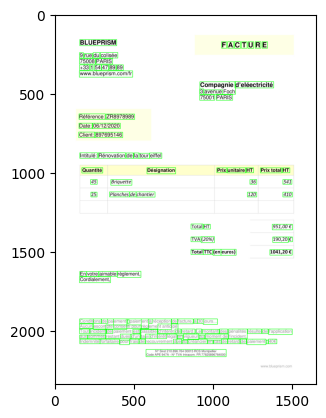

In [ ]:
###Find Contours
contours , hierarchy = cv2.findContours(dilated , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
img2=img.copy()
for cnt in contours :
  x , y , w , h =cv2.boundingRect(cnt)
  rect=cv2.rectangle(img2 , (x , y) , (x+w , y+h) , (0 , 255, 0 ) , 2)
plt.imshow(rect)
plt.show()

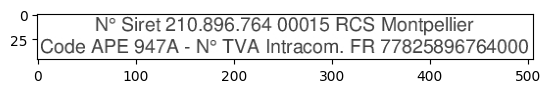

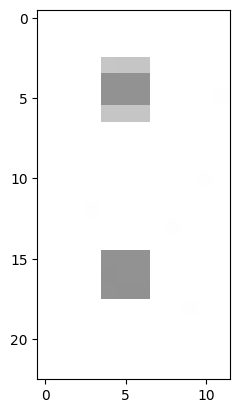

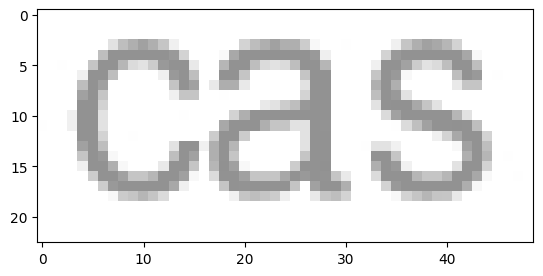

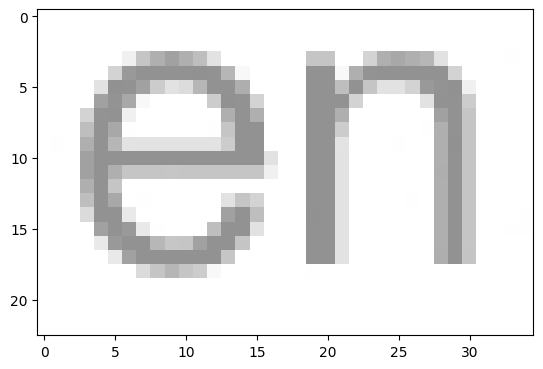

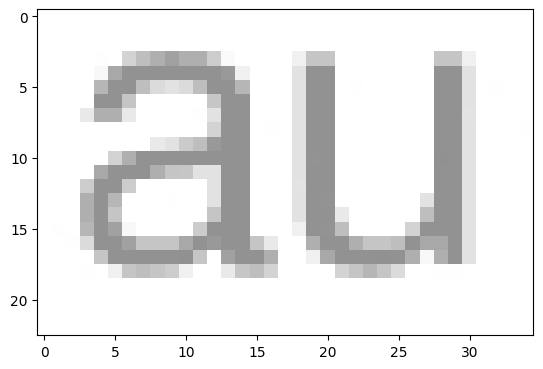

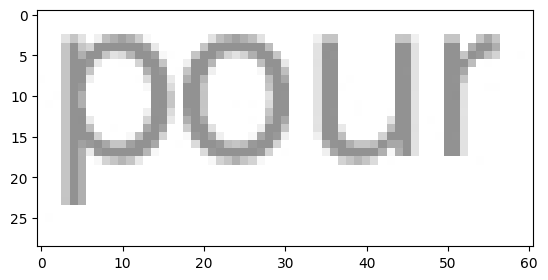

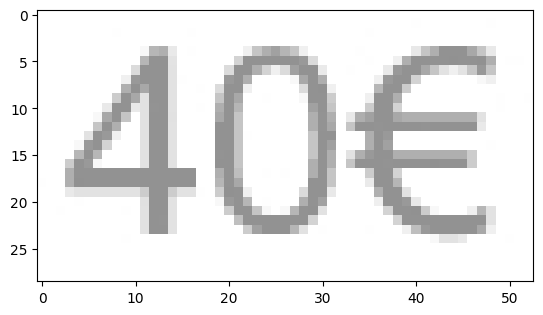

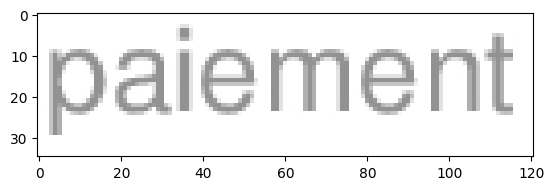

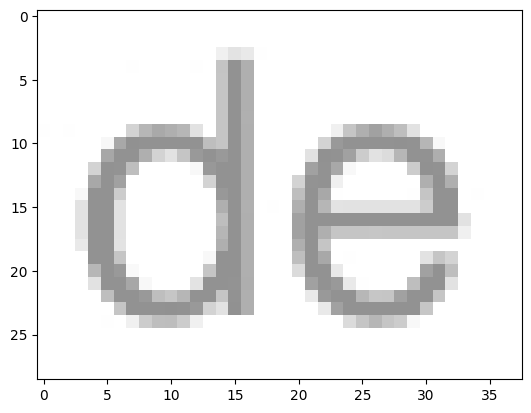

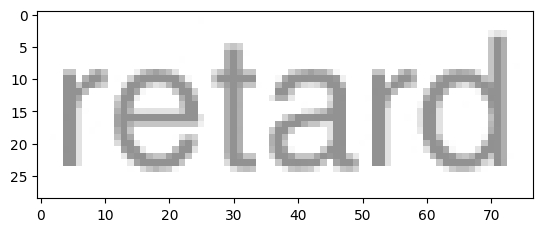

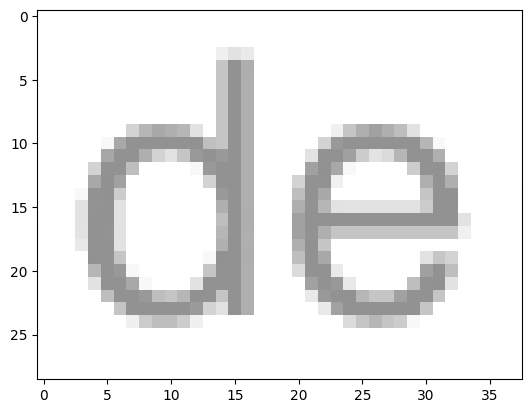

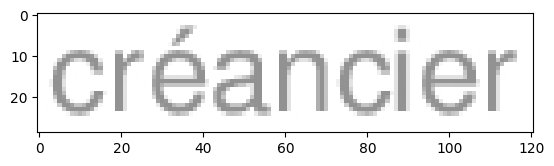

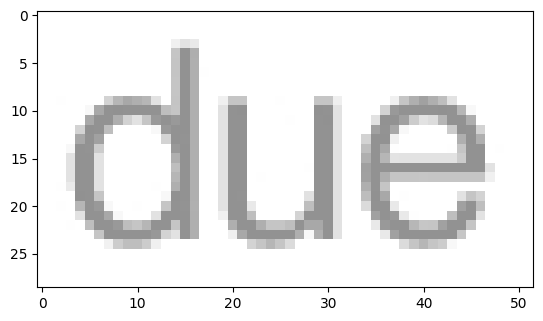

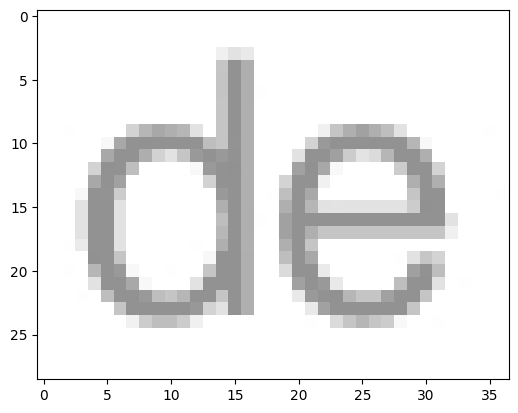

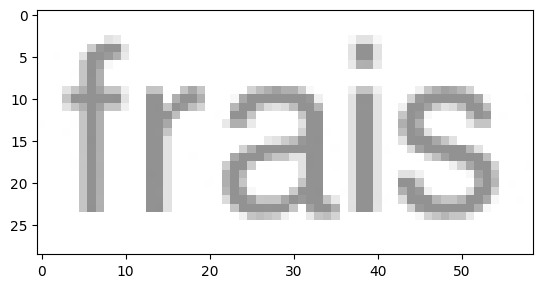

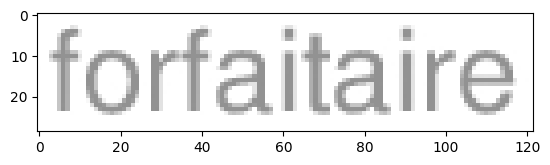

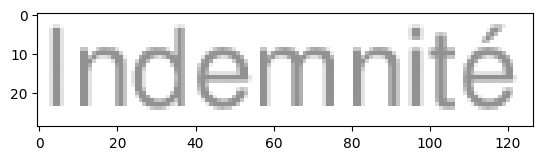

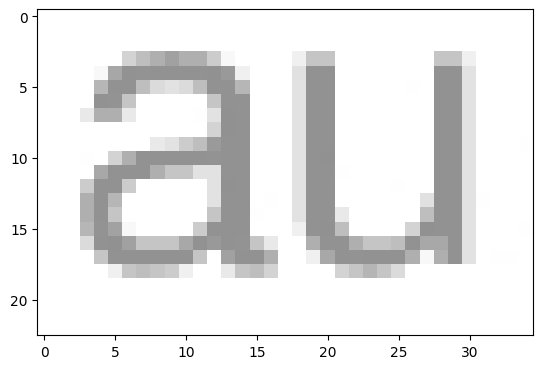

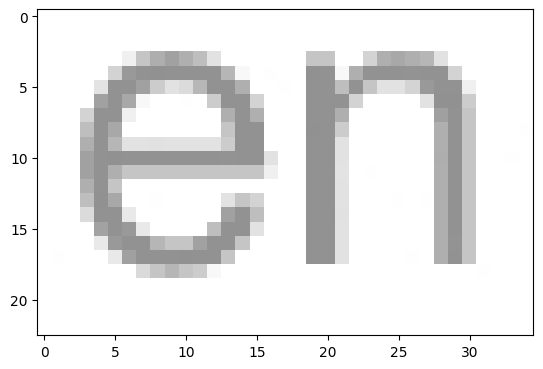

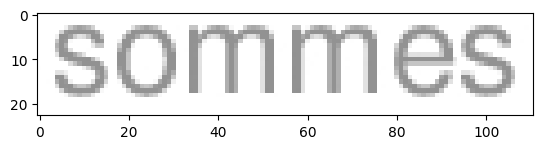

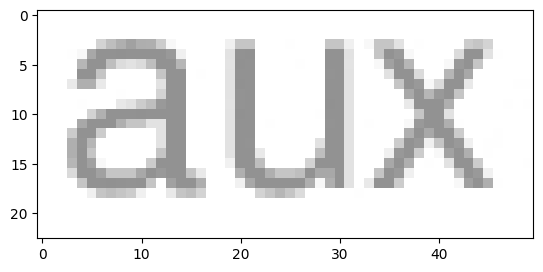

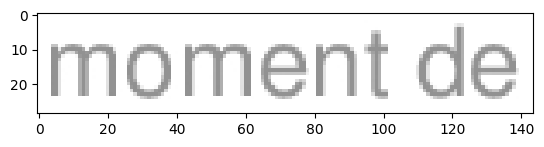

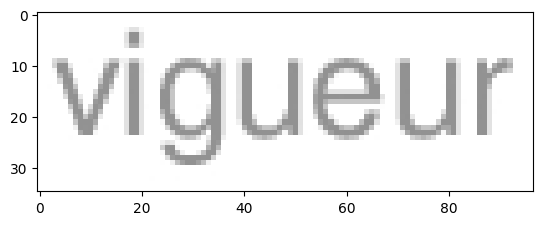

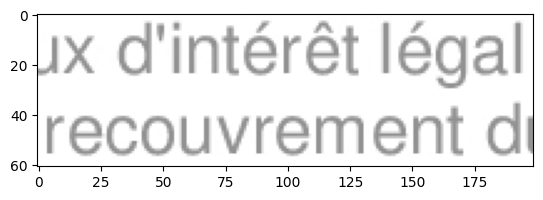

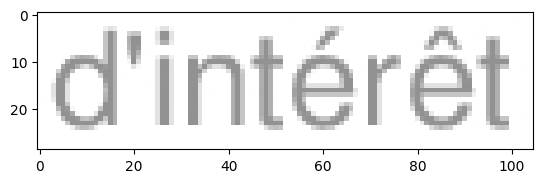

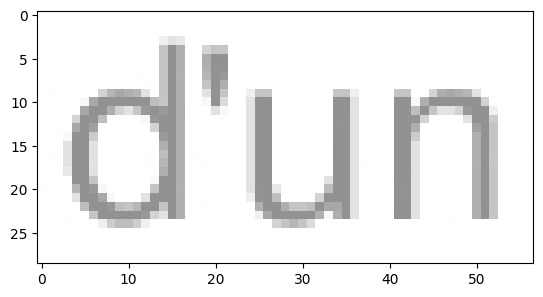

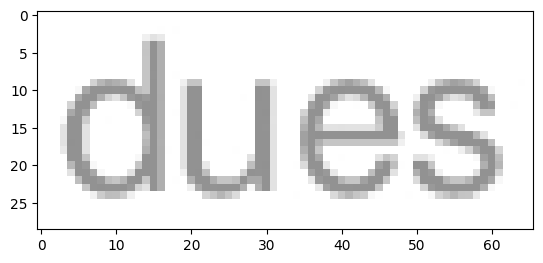

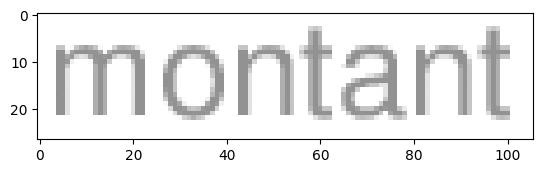

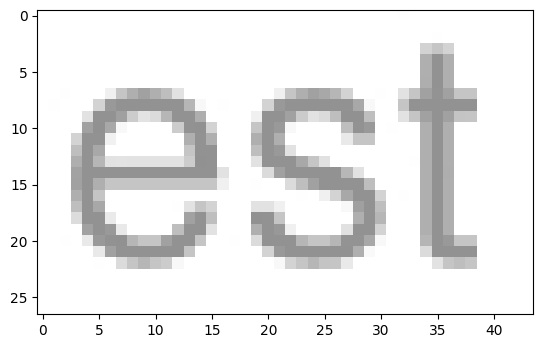

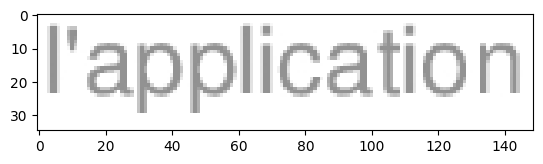

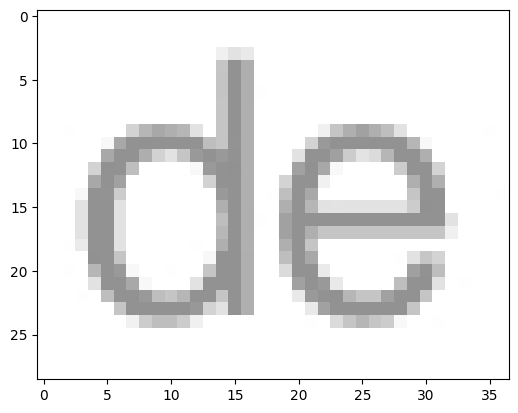

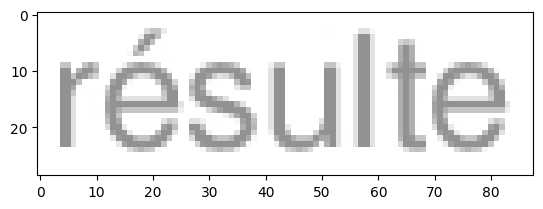

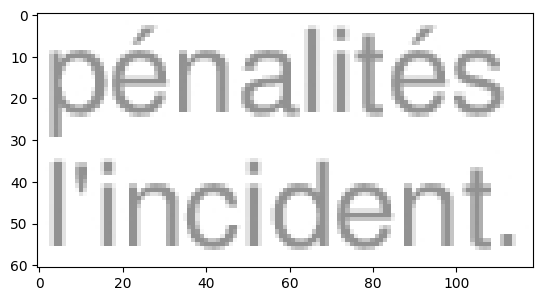

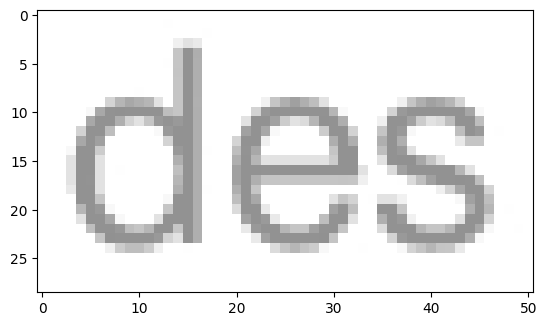

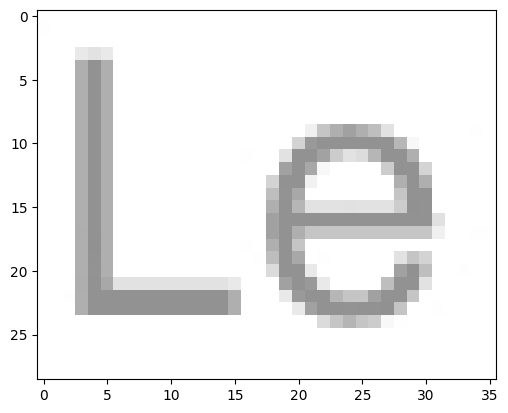

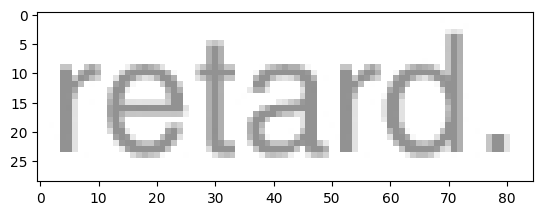

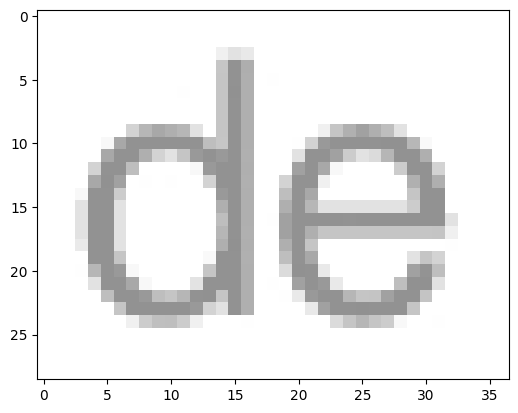

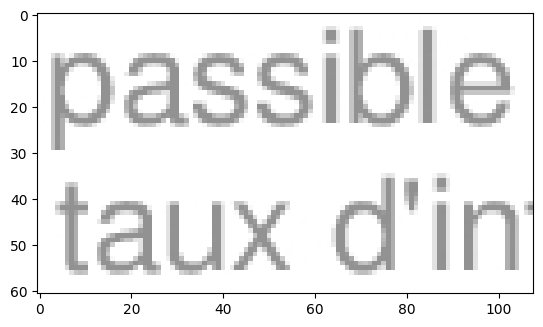

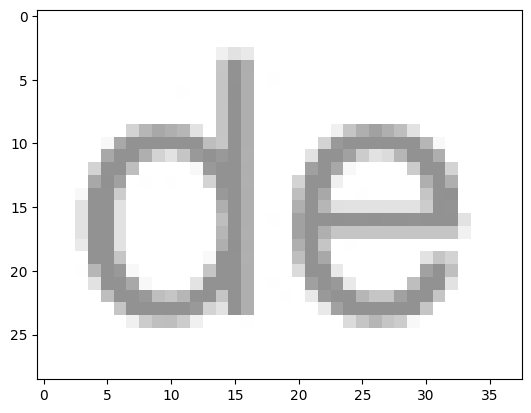

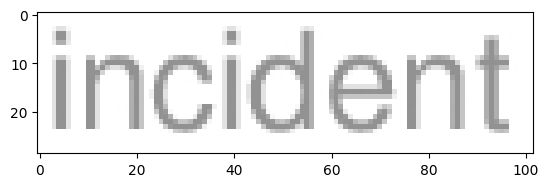

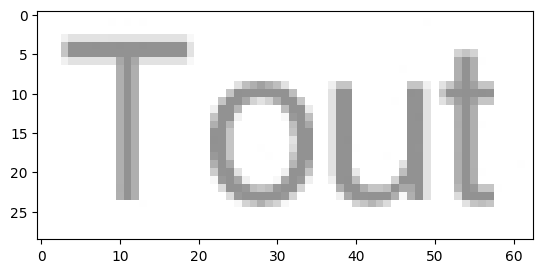

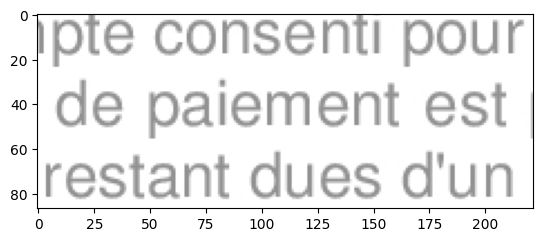

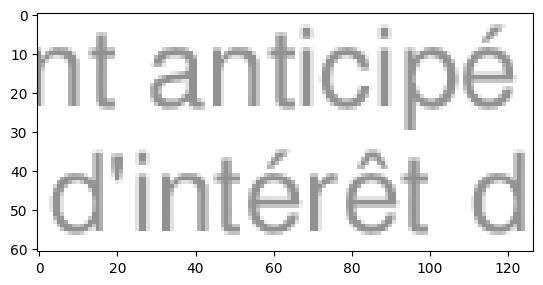

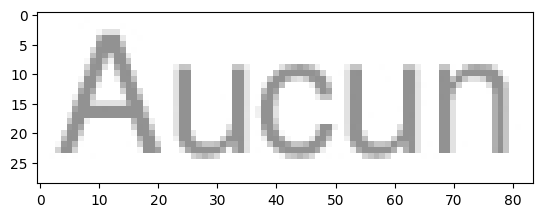

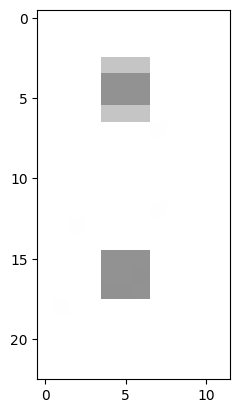

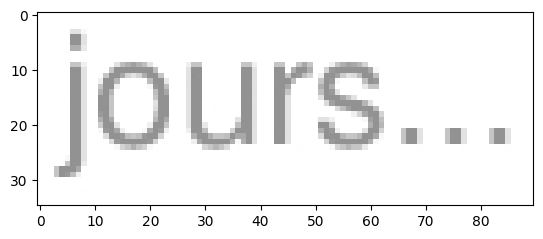

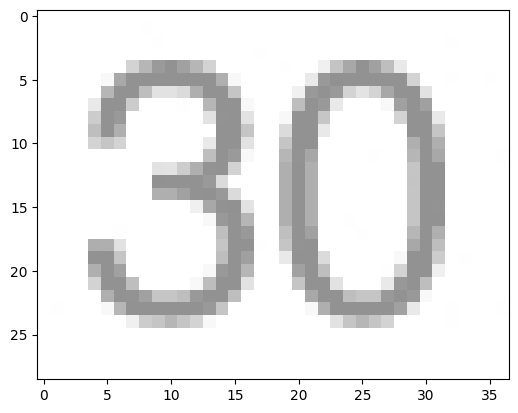

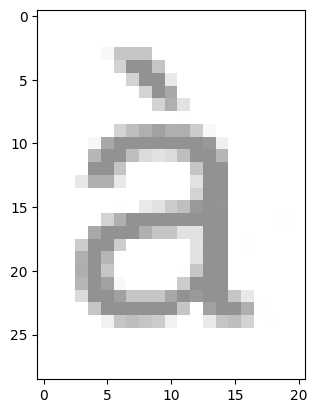

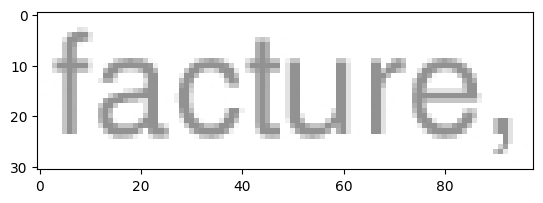

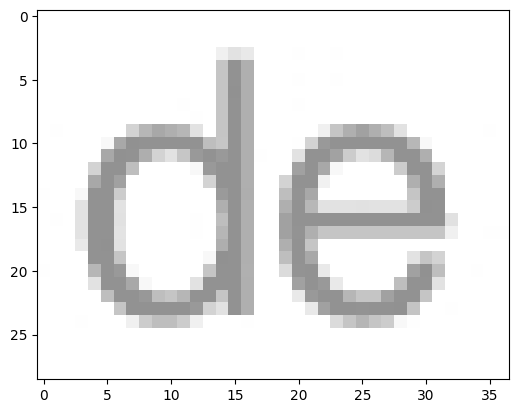

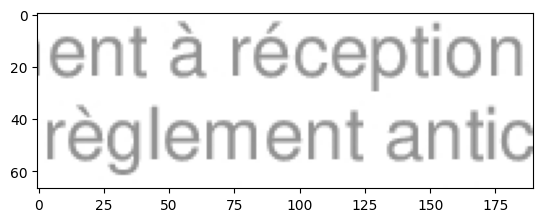

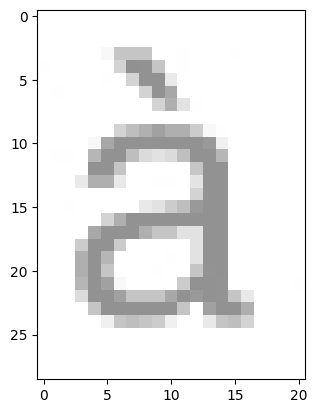

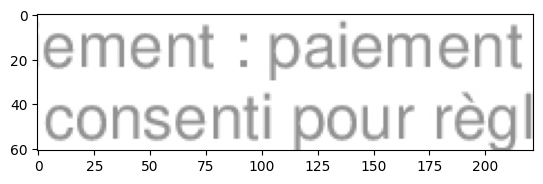

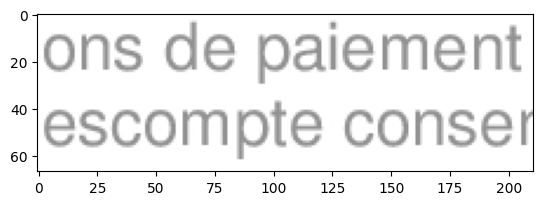

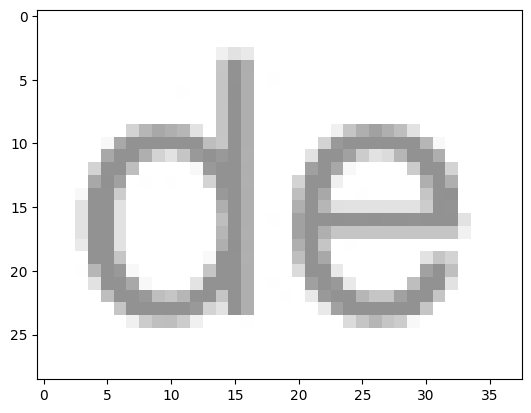

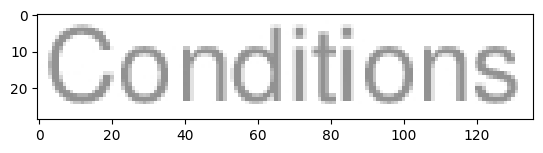

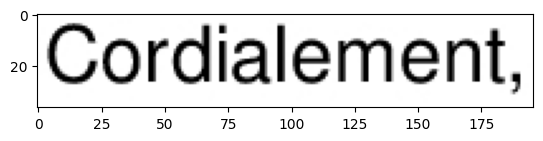

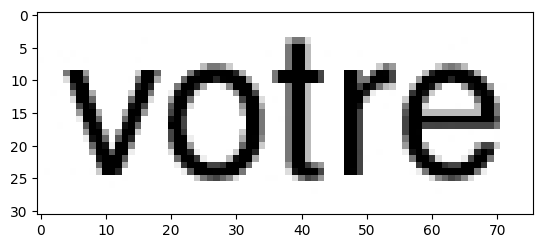

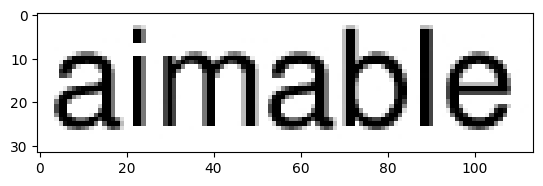

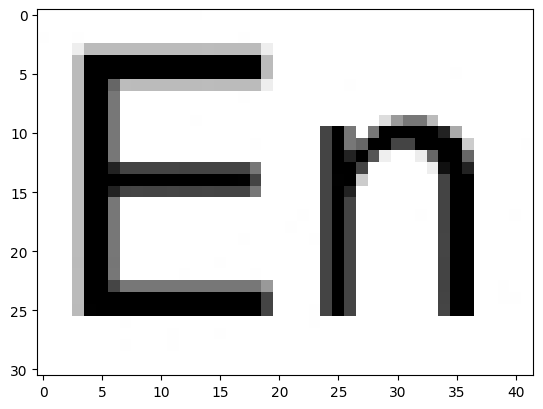

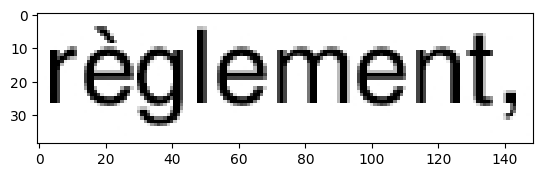

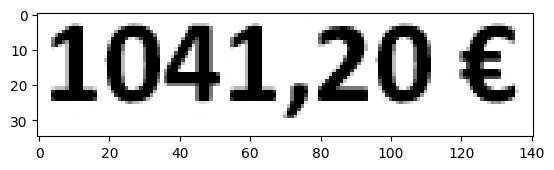

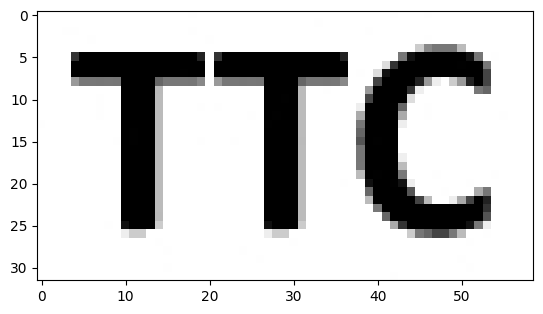

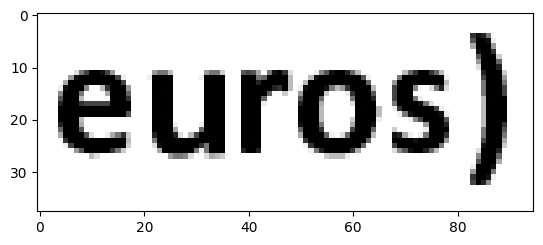

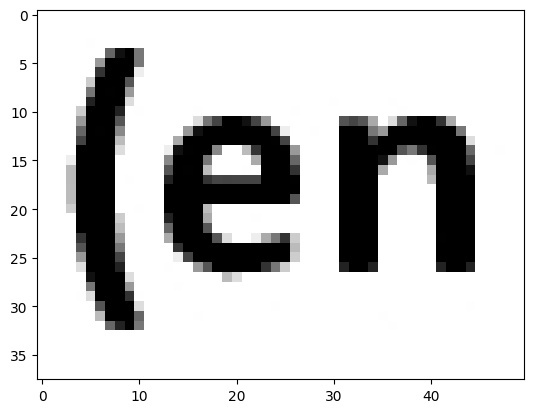

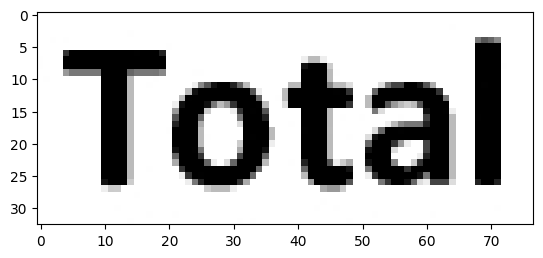

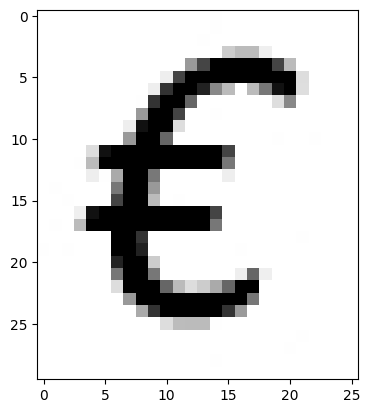

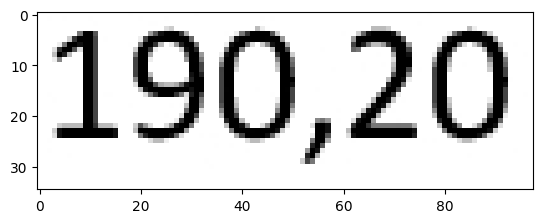

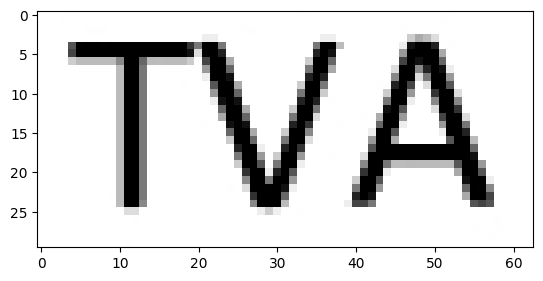

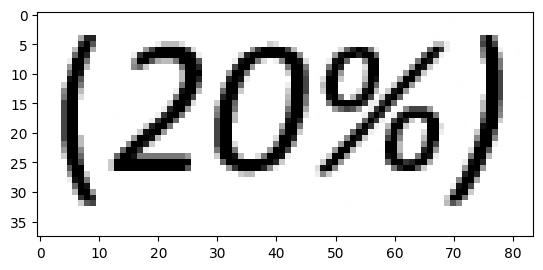

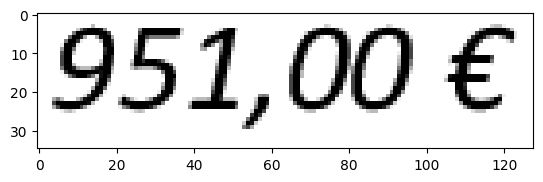

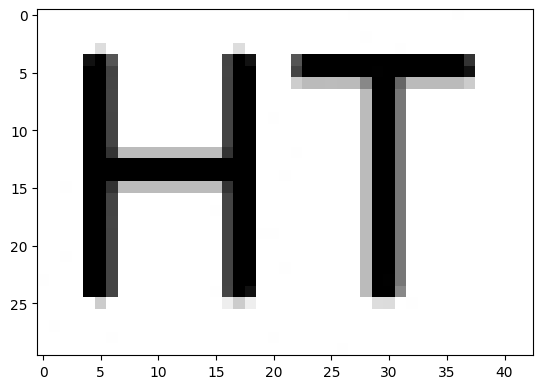

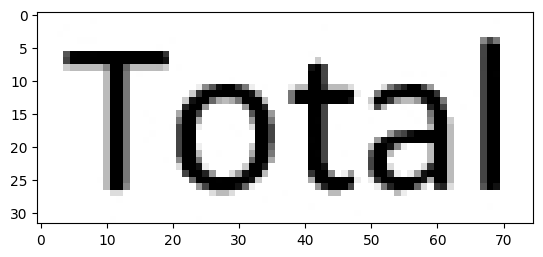

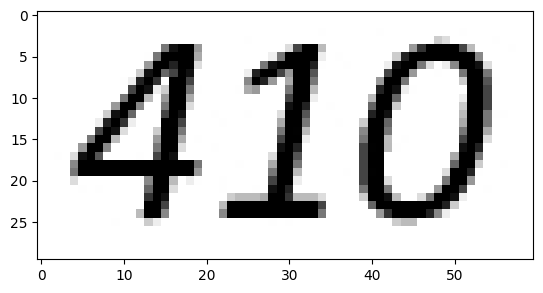

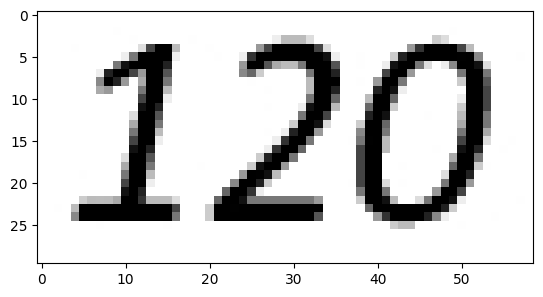

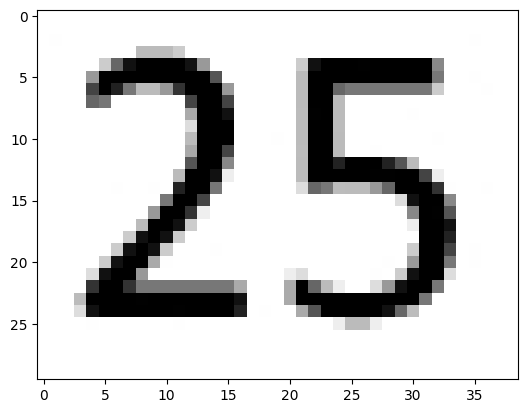

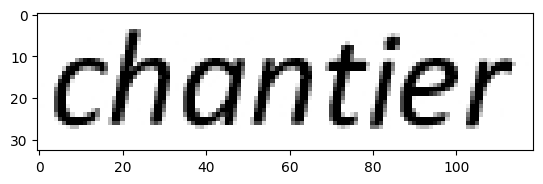

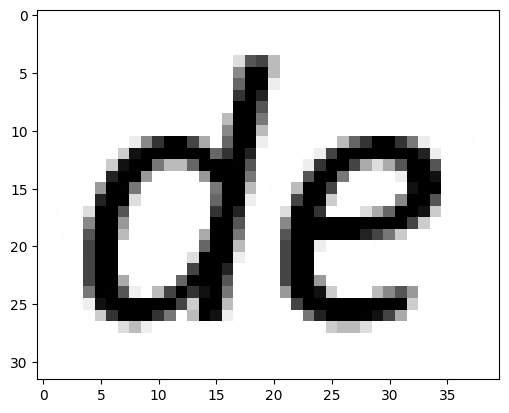

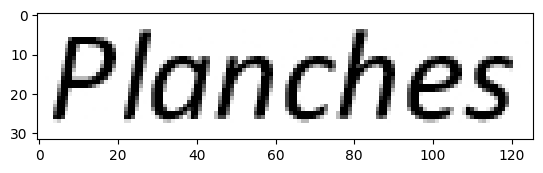

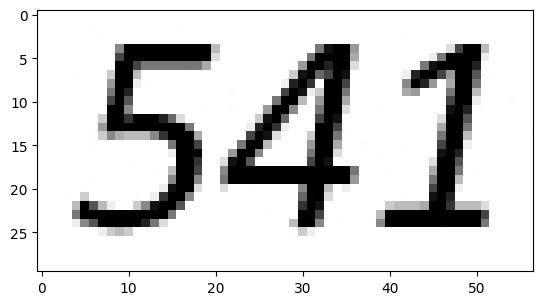

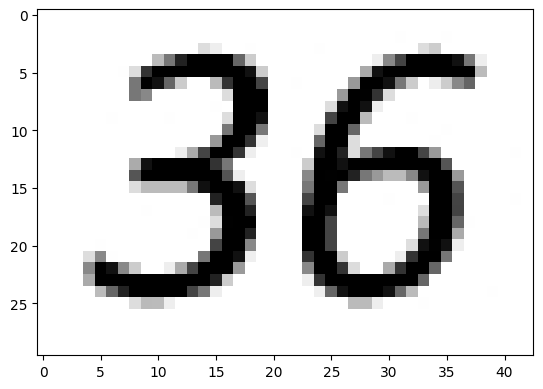

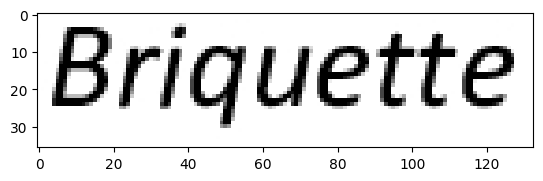

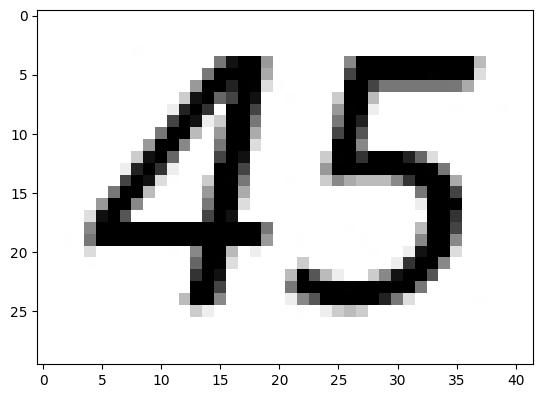

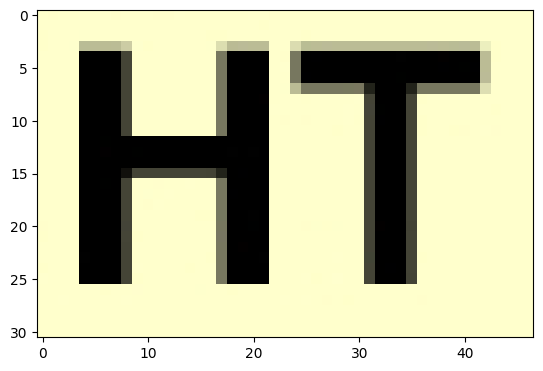

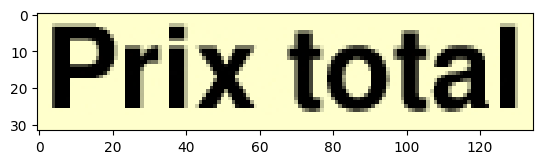

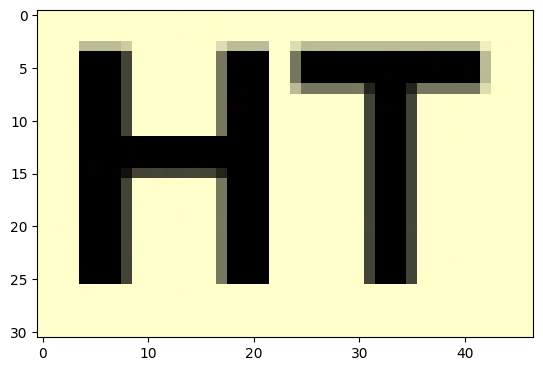

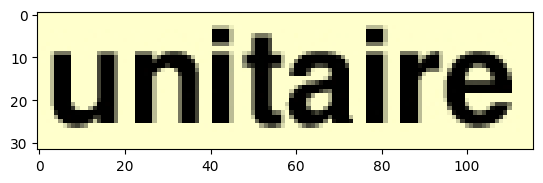

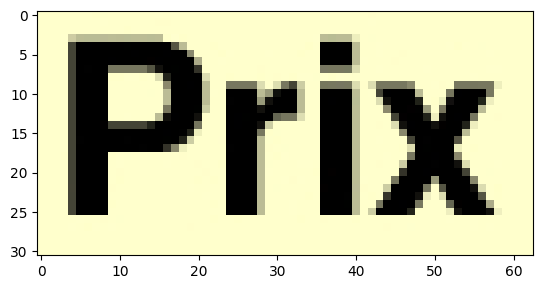

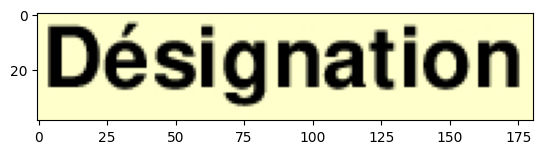

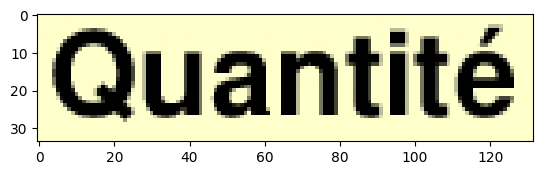

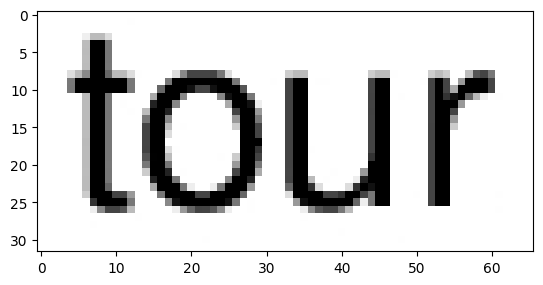

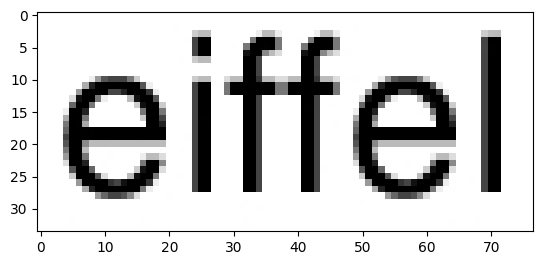

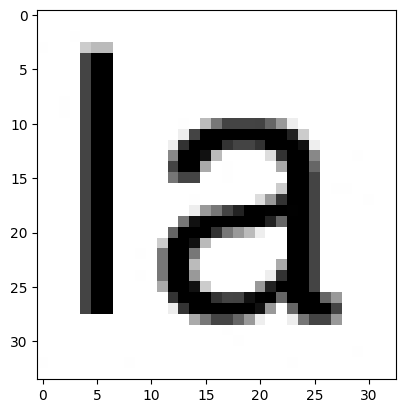

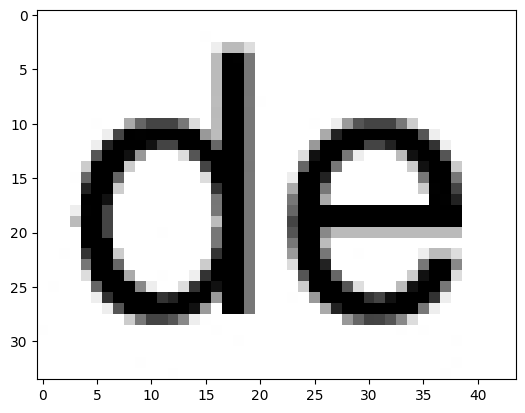

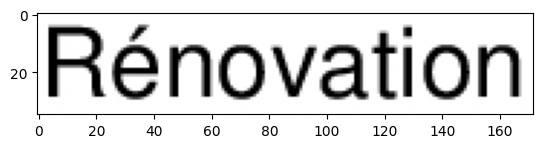

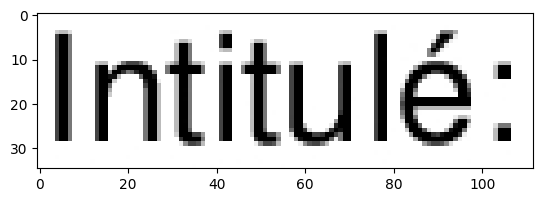

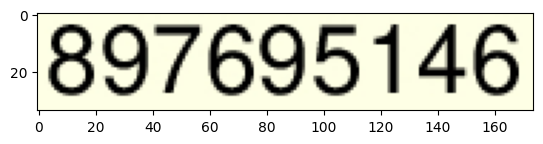

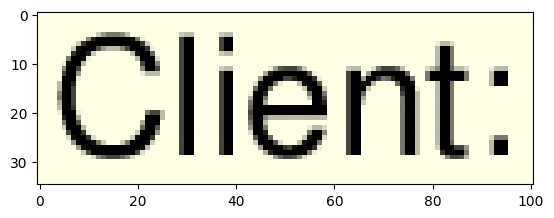

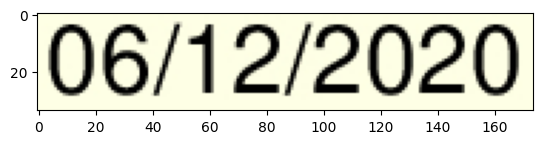

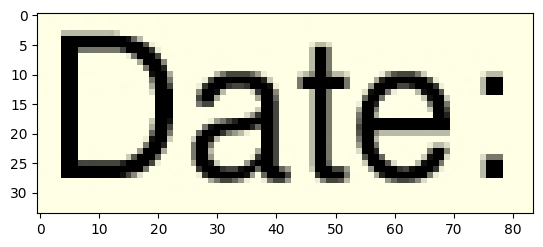

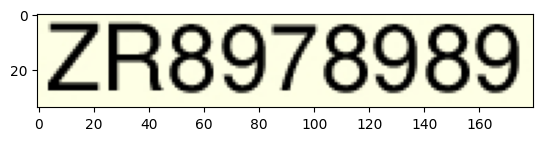

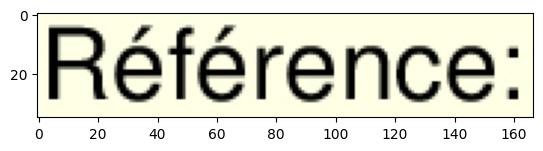

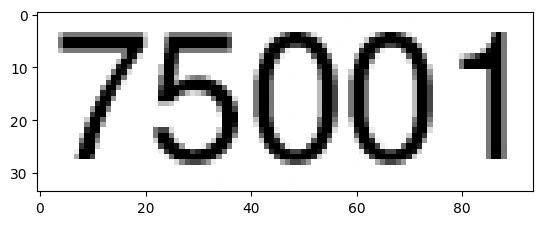

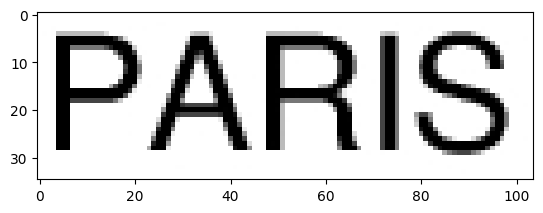

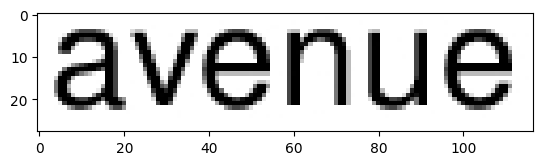

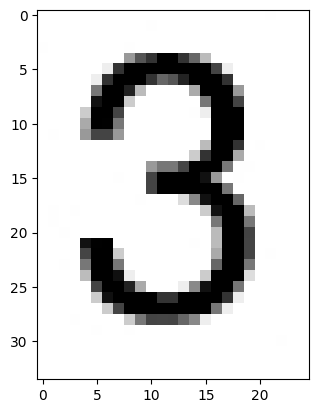

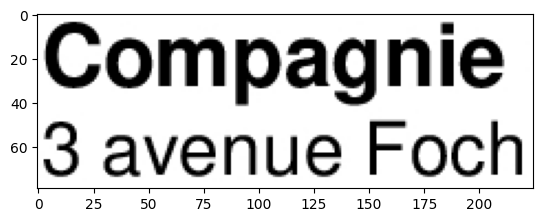

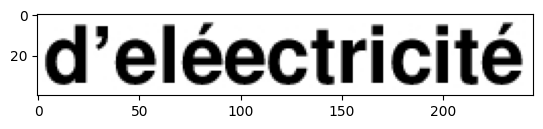

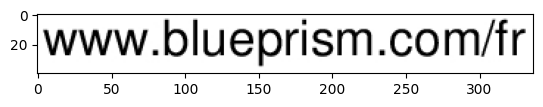

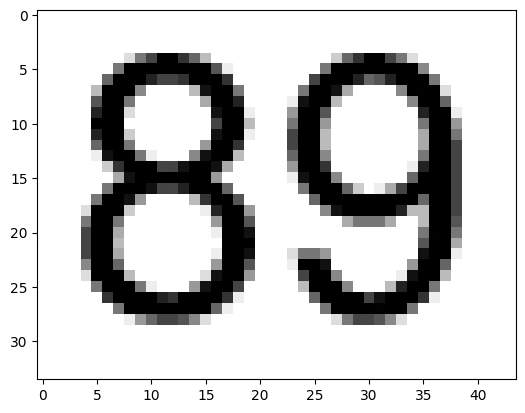

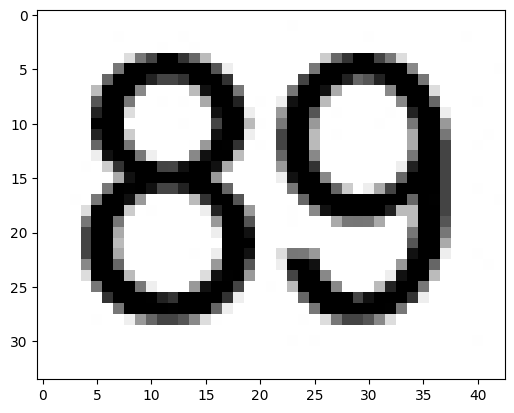

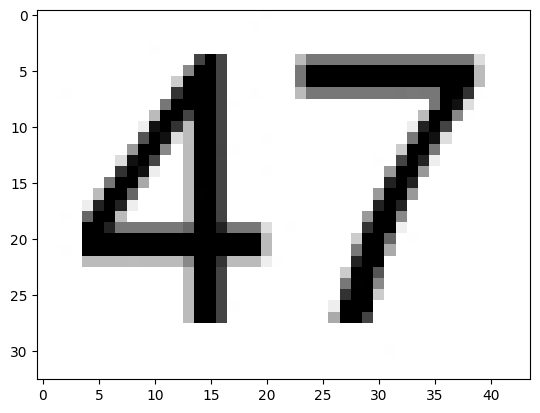

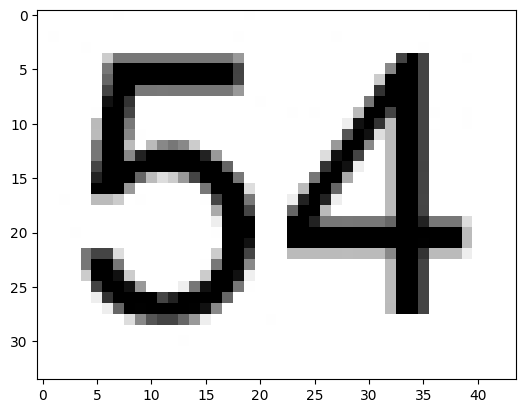

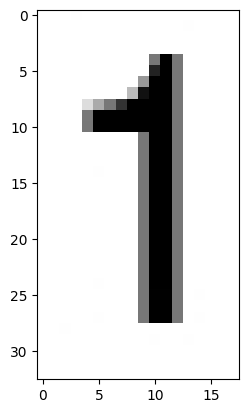

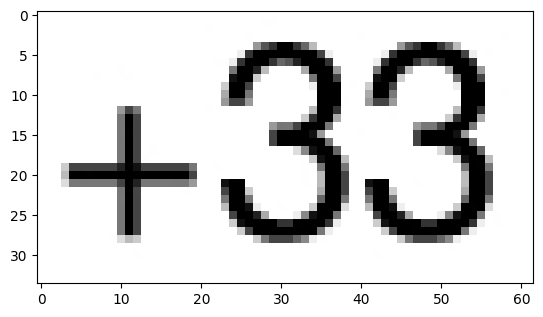

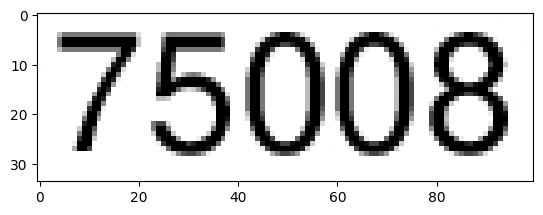

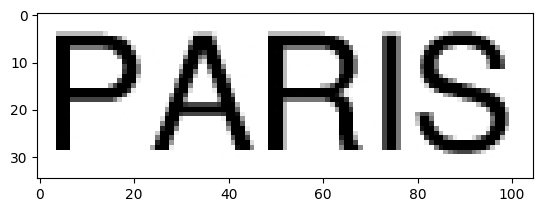

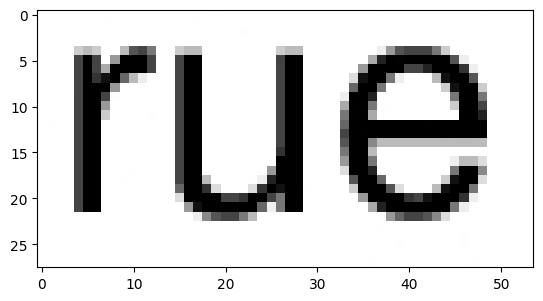

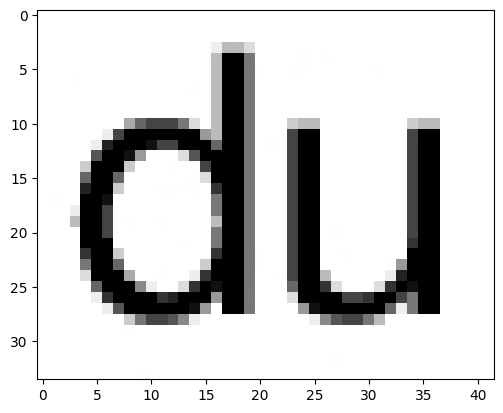

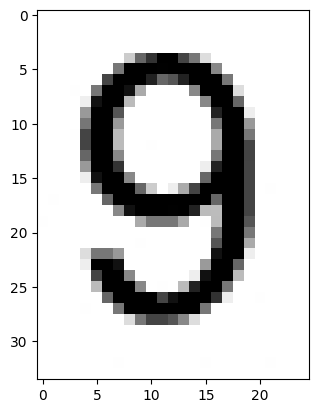

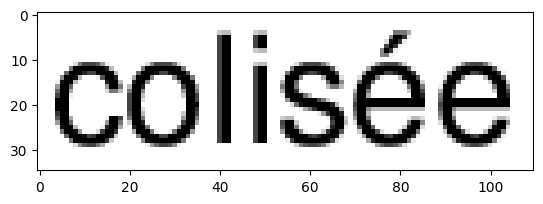

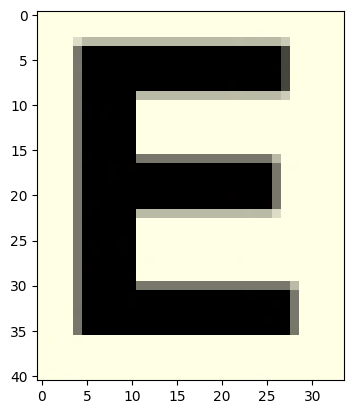

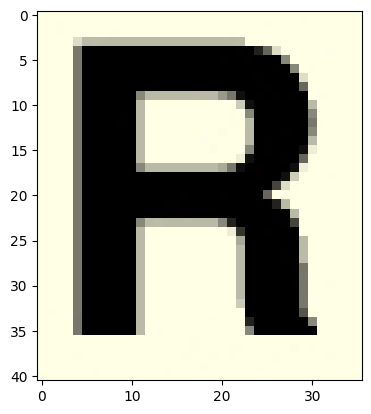

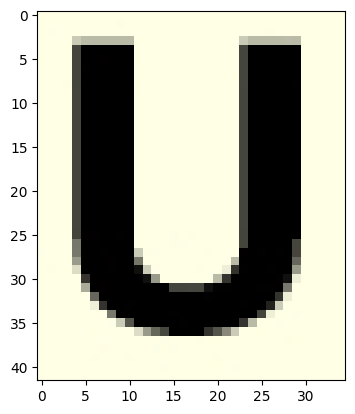

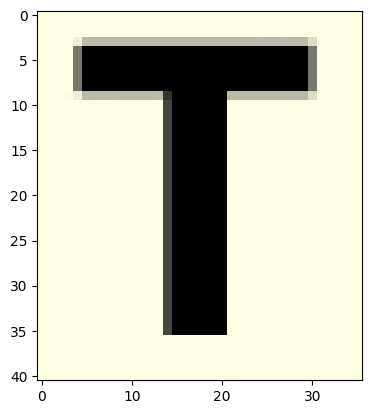

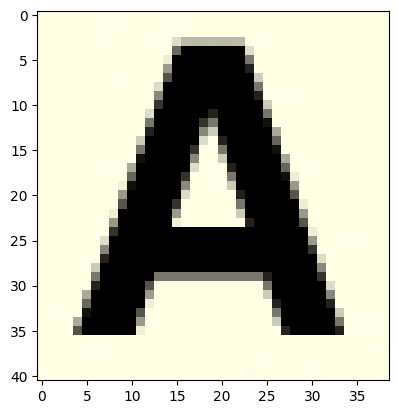

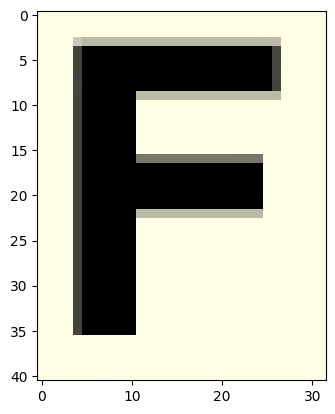

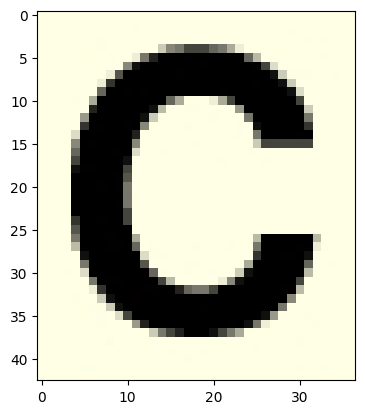

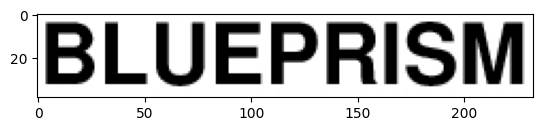

In [ ]:
for cnt in contours :
  x , y , w, h = cv2.boundingRect(cnt)
  ROI = img[y:y+h , x:x+w]
  plt.imshow(ROI)
  plt.show()

In [ ]:
liste=[]
for cnt in contours :
  x ,y ,w ,h = cv2.boundingRect(cnt)
  RIO=img[y:y+h , x:x+w]
  Ex=pytesseract.image_to_string(RIO)
  liste.append(Ex)
liste

['Ne Siret 210.896.764 00015 RCS Montpellier\nCode APE 947A - N° TVA Intracom. FR 77825896764000\n\x0c',
 '\x0c',
 'cas\n\x0c',
 'en\n\x0c',
 'au\n\x0c',
 'pour\n\x0c',
 '\x0c',
 'paiement\n\x0c',
 '\x0c',
 'retard\n\x0c',
 '\x0c',
 'créancier\n\x0c',
 'due\n\x0c',
 '\x0c',
 'frais\n\x0c',
 'forfaitaire\n\x0c',
 'Indemnité\n\x0c',
 'au\n\x0c',
 'en\n\x0c',
 'sommes\n\x0c',
 'aux\n\x0c',
 'moment de\n\x0c',
 'vigueur\n\x0c',
 "1x d'intérét légal\nrecouvrement di\n\x0c",
 "d'intérét\n\x0c",
 "d'un\n\x0c",
 'dues\n\x0c',
 '\x0c',
 'est\n\x0c',
 "l'application\n\x0c",
 '\x0c',
 'résulte\n\x0c',
 "pénalités\nl'incident.\n\x0c",
 'des\n\x0c',
 '\x0c',
 'retard.\n\x0c',
 '\x0c',
 "passible\ntaux d'in\n\x0c",
 '\x0c',
 'incident\n\x0c',
 '\x0c',
 "pte consent! pour\nde paiement est\nrestant dues d'un\n\x0c",
 "nt anticipé\nd'intérét d\n\x0c",
 'Aucun\n\x0c',
 '\x0c',
 'jours...\n\x0c',
 '\x0c',
 '\x0c',
 'facture,\n\x0c',
 '\x0c',
 'ent a réception\nréglement antic\n\x0c',
 '\x0c',
 'ement : p

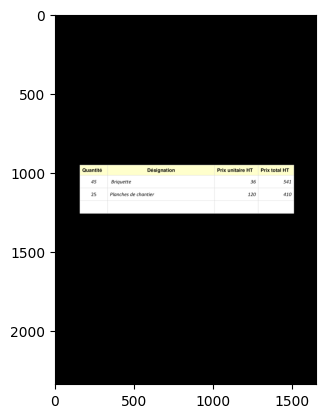

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/Facture_2.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (e.g., Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a function to filter potential table contours
def is_contour_a_table(cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)

    # Customize these thresholds based on your images
    return aspect_ratio > 2 and h > 50 and w > 50

# Filter out the potential table contours
table_contours = [cnt for cnt in contours if is_contour_a_table(cnt)]

# Create a mask for the detected tables
table_mask = np.zeros_like(image, dtype=np.uint8)

# Draw the detected tables on the mask
cv2.drawContours(table_mask, table_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Extract the tables from the original image
extracted_tables = cv2.bitwise_and(image, table_mask)

# Save or display the extracted tables
plt.imshow(extracted_tables)
plt.show()


In [ ]:
##### Implimentation du NLP
! python -m spacy download en_core_web_lg

2023-10-28 17:12:59.805748: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 17:12:59.805828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 17:12:59.805873: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 17:12:59.819392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-28 17:13:03.295624: W tensorflow/compiler/

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm

In [ ]:
nlp=en_core_web_sm.load()

In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp('BLUEPRISME Facture Paris , reference : ZR13843238923 , Date Septembre 6 2023 , total price :1202€ , TVA: 7%')
for token in doc.ents :
  print(token.text , token.label_)
  print(spacy.explain(token.label_))

Paris GPE
Countries, cities, states
6 2023 DATE
Absolute or relative dates or periods
1202 DATE
Absolute or relative dates or periods
€ MONEY
Monetary values, including unit
TVA ORG
Companies, agencies, institutions, etc.
7% PERCENT
Percentage, including "%"


In [ ]:
train_data = [
    ("The Eiffel Tower in Paris is a famous landmark.", {"entities": [(17, 22, "LOC")]}),
    ("This jacket costs $75 after the discount.", {"entities": [(15, 20, "PRICE")]}),
    ("I need a new MacBook Pro.", {"entities": [(13, 25, "PRODUCT")]}),
    ("The meeting is set for August 5, 2023.", {"entities": [(20, 34, "DATE")]}),
    ("Your order reference is ORD56789.", {"entities": [(21, 29, "REF")]}),
    ("Emily and John will attend the event.", {"entities": [(0, 5, "PERSON"), (10, 14, "PERSON")]}),
    ("The VAT rate in Germany is 19%.", {"entities": [(22, 25, "TVA")]}),
    ("I visited Tokyo, Japan, and Seoul, South Korea.", {"entities": [(10, 15, "LOC"), (20, 29, "LOC")]}),
    ("The antique chair is priced at £200.", {"entities": [(25, 30, "PRICE")]}),
    ("My birthday is on December 20, 1990.", {"entities": [(15, 31, "DATE")]}),
    ("Reference number: REF98765.", {"entities": [(15, 23, "REF")]}),
    ("Alice and Bob are good friends.", {"entities": [(0, 5, "PERSON"), (10, 13, "PERSON")]}),
    ("The standard VAT rate in the EU is 21%.", {"entities": [(27, 30, "TVA")]}),
    ("The Louvre Museum in Paris is a popular tourist attraction.", {"entities": [(18, 23, "LOC")]}),
    ("The laptop costs $1,199, which is a great deal.", {"entities": [(16, 21, "PRICE")]}),
    ("I just ordered a Samsung Galaxy S21.", {"entities": [(14, 30, "PRODUCT")]}),
    ("The event is scheduled for September 10, 2023.", {"entities": [(31, 45, "DATE")]}),
    ("Your customer ID is CID-12345.", {"entities": [(18, 27, "REF")]}),
    ("Linda and David are getting married.", {"entities": [(0, 5, "PERSON"), (10, 15, "PERSON")]}),
    ("The VAT rate in Italy is 22%.", {"entities": [(22, 25, "TVA")]}),
    ("I traveled to Sydney, Australia, and Beijing, China.", {"entities": [(13, 19, "LOC"), (26, 31, "LOC")]}),
    ("The antique vase is on sale for £250.", {"entities": [(26, 31, "PRICE")]}),
    ("Our annual meeting is on July 5, 2023.", {"entities": [(21, 35, "DATE")]}),
    ("Reference: REF-XYZ987.", {"entities": [(11, 19, "REF")]}),
    ("Sarah and Michael won the award.", {"entities": [(0, 5, "PERSON"), (10, 17, "PERSON")]}),
    ("The reduced VAT rate in Spain is 10%.", {"entities": [(28, 31, "TVA")]}),
    ("I'm planning a trip to Paris and Rome next summer.", {"entities": [(25, 30, "LOC"), (35, 39, "LOC")]}),
    ("The cost of the laptop is $999.", {"entities": [(24, 28, "PRICE")]}),
    ("I just bought a new iPhone 13.", {"entities": [(19, 26, "PRODUCT")]}),
    ("The conference is scheduled for October 15th, 2023.", {"entities": [(31, 47, "DATE")]}),
    ("Please quote reference number REF12345 in your email.", {"entities": [(23, 30, "REF")]}),
    ("John Smith is a well-known author.", {"entities": [(0, 10, "PERSON")]}),
    ("The VAT rate in France is 20%.", {"entities": [(22, 25, "TVA")]}),
]

In [ ]:
from __future__ import annotations
from spacy.util import minibatch, compounding
import random
from tqdm import tqdm
from spacy.training.example import Example

def Train_model(train_data, n_iters=250, model_output_path=""):
    # Create a blank English model
    nlp = spacy.blank('en')
    print('Creating a blank model')
    # Check if the 'ner' component already exists in the pipeline, if not, create it
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe("ner", last=True)
    else:
        ner = nlp.get_pipe('ner')
    # Add labels for named entities (e.g., 'PERSON', 'LOC', 'PRICE')
    for _, annotations in train_data:
        for ent in annotations['entities']:
            ner.add_label(ent[2])
    # Get names of other pipeline components (e.g., 'tagger', 'parser')
    other_pipe = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    # Disable other pipeline components to focus on training NER
    with nlp.disable_pipes(*other_pipe):
        # Initialize the optimizer
        optimizer = nlp.begin_training()
        # Define a function to generate batch sizes dynamically
        sizes = compounding(4.0, 32.0, 1.001)
        # Training loop
        for it in range(n_iters):
            # Shuffle the training data for randomness
            random.shuffle(train_data)
            losses = {}
            # Process the training data in batches
            for batch in minibatch(train_data, size=3):
                for text, annotations in batch:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
                    # Update the NER model with the current example
                    nlp.update(
                        [example],
                        drop=0.5,  # Dropout rate (adjust as needed)
                        sgd=optimizer,
                        losses=losses
                    )
            # Print the loss for the current iteration
            print(losses)
        # Save the trained model to the specified output path
        if model_output_path:
            nlp.to_disk(model_output_path)
            print(f"Model saved to: {model_output_path}")




In [ ]:
Train_model(train_data , model_output_path ='/content/drive/MyDrive/new_model2')

In [ ]:
nlp = spacy.load('/content/drive/MyDrive/new_model2')
text = 'the Eiffel Tower in Paris is a famous landmark.'
doc=nlp(text)
for ent in doc.ents :
  print(ent.text , ent.label_)

In [ ]:
  import spacy
from spacy.training.example import Example

# Load the model
nlp = spacy.load("/content/drive/MyDrive/new_model1")

# Prepare the evaluation data
eval_data = [
    ("Sarah and Michael won the award.", {"entities": [(0, 5, "PERSON"), (10, 17, "PERSON")]}),
    ("The reduced VAT rate in Spain is 10%.", {"entities": [(28, 31, "TVA")]}),
    ("I'm planning a trip to Paris and Rome next summer.", {"entities": [(25, 30, "LOC"), (35, 39, "LOC")]}),
    ("The cost of the laptop is $999.", {"entities": [(24, 28, "PRICE")]}),
    ("I just bought a new iPhone 13.", {"entities": [(19, 26, "PRODUCT")]}),
]

# Initialize variables to store evaluation metrics
total_entities = 0
correct_entities = 0
predicted_entities = 0

# Evaluate the model on the evaluation data
for text, annotations in eval_data:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annotations)

    # Process the text
    nlp.update([example])

    # Calculate metrics for each entity type
    total_entities += len(annotations["entities"])
    correct_entities += len([ent for ent in doc.ents if ent.label_ in [ent[2] for ent in annotations["entities"]]])
    predicted_entities += len(doc.ents)

# Calculate precision, recall, and F1-score
precision = correct_entities / predicted_entities if predicted_entities > 0 else 0
recall = correct_entities / total_entities if total_entities > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
